In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set_context("poster")
sns.set_style("white")

In [2]:
def get_algs_data(f, df, d2f, n, lr, x_init):
    b1, b2, e = 0.9, 0.999, 1e-8
    m, v, t = [0., 0.], [0., 0.], 0
    adam_xs, newton_xs = [[x_init] for _ in range(2)]
    adam_fxs, newton_fxs = [[f(x_init)] for _ in range(2)]
    
    for _ in range(n - 1):
        x = adam_xs[-1]
        dfx = df(x)
        t += 1
        m = [b1*m[i] + (1 - b1)*dfx[i] for i in range(2)]
        v = [b2*v[i] + (1 - b2)*(dfx[i]**2) for i in range(2)]
        a_hat = lr * np.sqrt(1 - b2**t) / (1 - b1**t)
        x = [x[i] - a_hat * m[i] / (np.sqrt(v[i]) + e) for i in range(2)]
        adam_xs.append(x)
        adam_fxs.append(f(x))

    for _ in range(n - 1):
        x = newton_xs[-1]
        dfx, d2fx = df(x), d2f(x)
        u = np.dot(np.linalg.inv(d2fx), dfx)
        x = [x[i] - lr * u[i] for i in range(2)]
        newton_xs.append(x)
        newton_fxs.append(f(x))
    
    return adam_xs, newton_xs, adam_fxs, newton_fxs

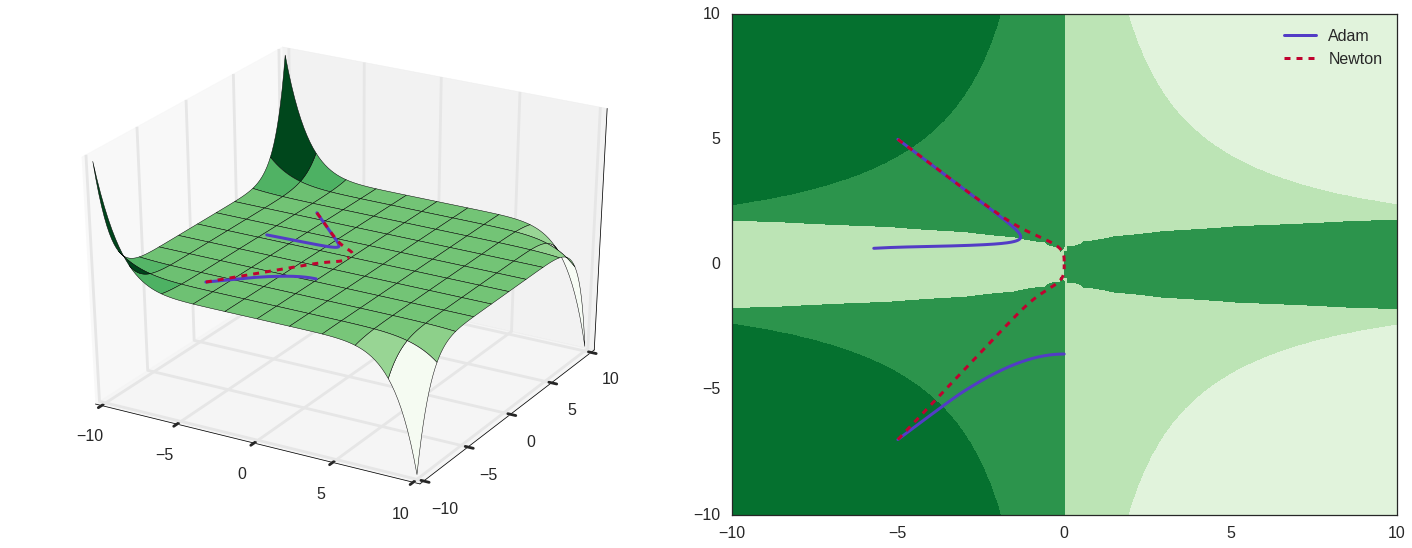

In [3]:
fig = plt.figure(figsize=(20, 8))
f = lambda x: x[0]**9 - (x[0]**7)*(x[1]**8)
df = lambda x: [9*(x[0]**8) - 7*(x[0]**6)*(x[1]**8), -8*(x[0]**7)*(x[1]**7)]
d2f = lambda x: np.array([[72*(x[0]**7) - 42*(x[0]**5)*(x[1]**8), -56*(x[0]**6)*(x[1]**7)], [-56*(x[0]**6)*(x[1]**7), -56*(x[0]**7)*(x[1]**6)]])
adam_xs1, newton_xs1, adam_fxs1, newton_fxs1 = get_algs_data(f, df, d2f, 21880, 0.1, [-5., 5.])
adam_xs2, newton_xs2, adam_fxs2, newton_fxs2 = get_algs_data(f, df, d2f, 100000, 0.1, [-5., -7.])

x1s, x2s = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
fxs = np.empty(x1s.shape)
for i in range(x1s.shape[0]):
    for j in range(x1s.shape[1]):
        fxs[i, j] = f([x1s[i, j], x2s[i, j]])

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.plot_surface(x1s, x2s, fxs, cmap="Greens")
ax1.set_zticks([])
ax1.plot(*zip(*adam_xs1), adam_fxs1, linewidth=3, color=sns.xkcd_rgb["blue with a hint of purple"])
ax1.plot(*zip(*newton_xs1), newton_fxs1, linestyle="--", linewidth=3, color=sns.xkcd_rgb["lipstick red"])
ax1.plot(*zip(*adam_xs2), adam_fxs2, linewidth=3, color=sns.xkcd_rgb["blue with a hint of purple"])
ax1.plot(*zip(*newton_xs2), newton_fxs2, linestyle="--", linewidth=3, color=sns.xkcd_rgb["lipstick red"])

ax2 = fig.add_subplot(1, 2, 2)
greens = sns.color_palette("Greens")
c = ax2.contourf(x1s, x2s, fxs, levels=[-1e15, -1e10, 0, 1e10, 1e15], colors=[greens[0], greens[1], greens[-2], greens[-1]])
ax2.plot(*zip(*adam_xs1), linewidth=3, color=sns.xkcd_rgb["blue with a hint of purple"], label="Adam")
ax2.plot(*zip(*newton_xs1), linestyle="--", linewidth=3, color=sns.xkcd_rgb["lipstick red"], label="Newton")
ax2.plot(*zip(*adam_xs2), linewidth=3, color=sns.xkcd_rgb["blue with a hint of purple"])
ax2.plot(*zip(*newton_xs2), linestyle="--", linewidth=3, color=sns.xkcd_rgb["lipstick red"])
ax2.legend()

fig.tight_layout()
fig.savefig("../data/adam_newton_visualize/plot.png", dpi=100)